# 1. fbprophet을 통한 시계열 예측 - 쇼핑몰 매출 예측

- pip install pystan
- pip install plotly
- conda install -c conda-forge conda
- conda install -c conda-forge fbprophet

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
data = pd.read_excel('Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
# Row ID칼럼을 인덱스로 변경해서 불러오기

data = pd.read_excel('Superstore.xls', index_col = 0)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [13]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# 전처리

In [15]:
# Category칼럼 중 Furniture 데이터만 추출

data = data[data['Category'] == 'Furniture']
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [16]:
# 필요한 칼럼만 추출

data = data[['Order Date', 'Sales']]
data.head()

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
4,2015-10-11,957.5775
6,2014-06-09,48.8600
11,2014-06-09,1706.1840


In [17]:
# 날짜 오름차순 정렬

data.sort_values('Order Date')

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
...,...,...
7637,2017-12-29,258.750
7633,2017-12-29,1207.840
5132,2017-12-29,101.120


In [18]:
# 날짜별로 groupby하여 Sales 총합 계산

data = data.groupby('Order Date').sum()
data

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


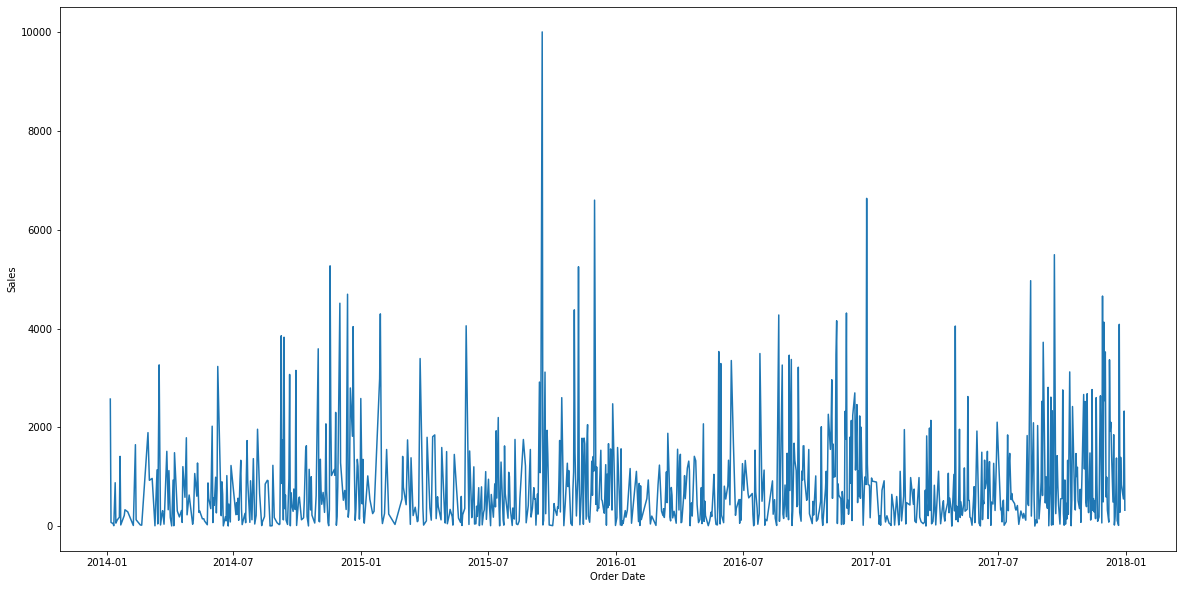

In [19]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = data.index, y = data['Sales'])

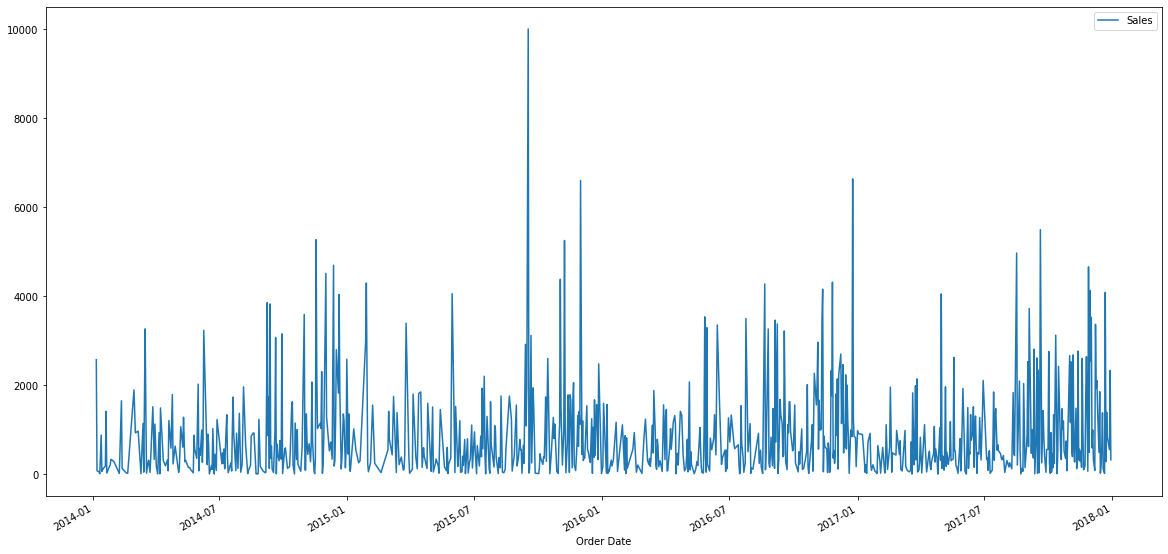

In [20]:
# 위와 동일한 그래프 그리는 코드

data.plot(figsize = (20, 10))

In [21]:
# 월별(MS) 평균 Sales 계산

data = data.resample('MS').mean()
data.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


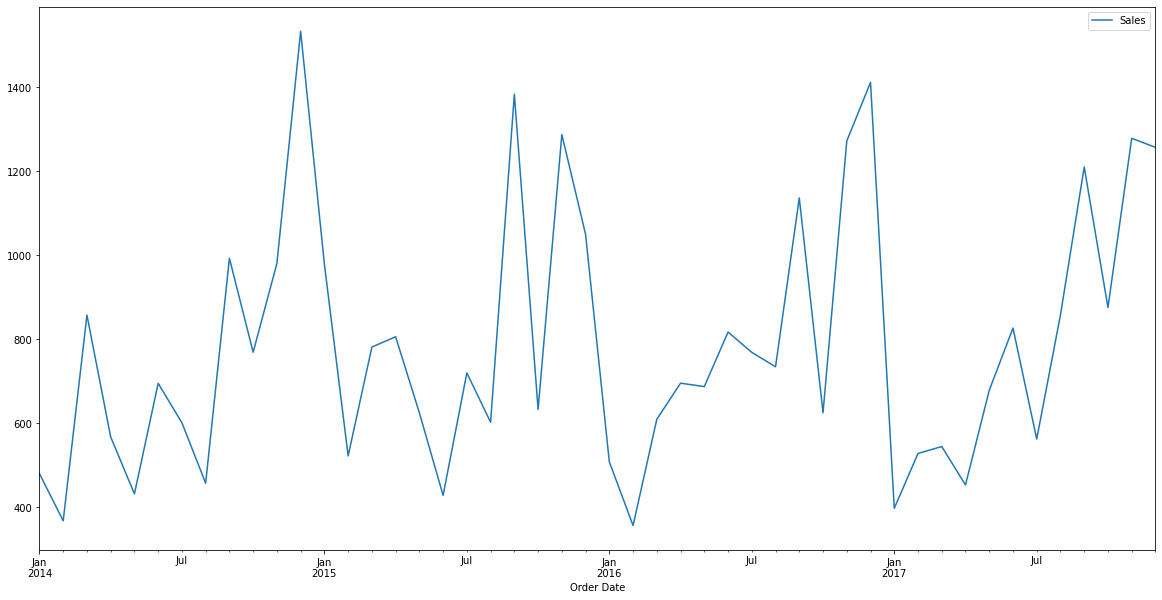

In [22]:
data.plot(figsize = (20, 10))

# prophet 모델링

In [24]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637509 sha256=f95b12d91a15a36854696d78ca7eea34e6498e621f28a5435311bc08a6e3e2c4
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.4
    Uninstalling cmdstanpy-1.0.4:
      Successfully uninstalled cmdstanpy-1.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmdstanpy 0.9.5 which is incompatible.


In [25]:
from fbprophet import Prophet

In [26]:
# 인덱스에 있는 날짜 reset_index

df = data.reset_index()

In [27]:
# prophet 사용하려면 ds와 y로 칼럼이름 변경 필요

df.columns = ['ds', 'y']
df

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049188
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [28]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
# 기간을 12달로 설정하여 예측 구간 설정

future = model.make_future_dataframe(periods = 12, freq = 'MS')
future.tail()

,ds
55,2018-08-01
56,2018-09-01
57,2018-10-01
58,2018-11-01
59,2018-12-01


In [30]:
# 예측

pred = model.predict(future)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,726.057713,383.950339,694.718171,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,0.0,0.0,0.0,535.372051
1,2014-02-01,727.494023,304.114961,607.696803,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,0.0,0.0,0.0,451.116320
2,2014-03-01,728.791335,556.192390,854.048109,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,0.0,0.0,0.0,706.401580
3,2014-04-01,730.227645,473.932726,787.963522,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,0.0,0.0,0.0,630.086487
4,2014-05-01,731.617622,414.505158,717.317746,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,0.0,0.0,0.0,570.801960


In [32]:
pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]     # '날짜', '예측값', '예측하한값', '예측상한값'
pred.head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,535.372051,383.950339,694.718171
1,2014-02-01,451.116320,304.114961,607.696803
2,2014-03-01,706.401580,556.192390,854.048109
3,2014-04-01,630.086487,473.932726,787.963522
4,2014-05-01,570.801960,414.505158,717.317746


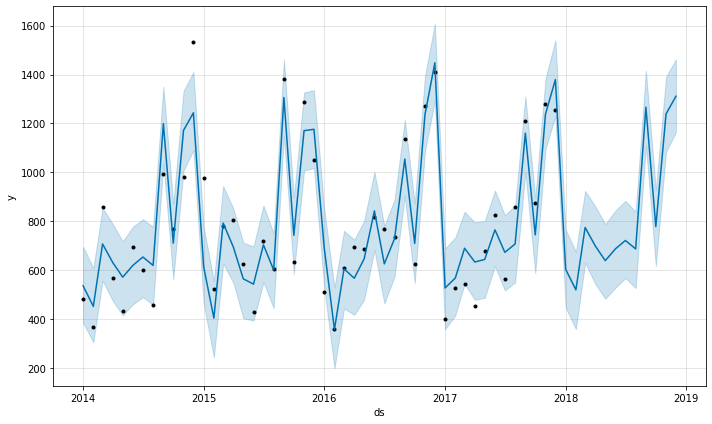

In [33]:
fig1 = model.plot(pred)

- 점이 찍혀있지 않은 2018부근이 미래를 예측한 부분
- 음영 부분은 오차 고려한 범위를 나타냄

# 2017년 데이터 예측하여 비교

In [34]:
new_df = data[: '2016']
new_df

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [35]:
new_df.reset_index(inplace = True)
new_df.columns = ['ds', 'y']
new_df

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049188
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [36]:
# 2017년 데이터 예측이므로 기간은 12개월

model = Prophet()
model.fit(new_df)

future = model.make_future_dataframe(periods = 12, freq = 'MS')     # 예측하고자 하는 범위 지정

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
pred = model.predict(future)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,681.588219,480.689468,768.398601,681.588219,681.588219,-47.448838,-47.448838,-47.448838,-47.448838,-47.448838,-47.448838,0.0,0.0,0.0,634.139381
1,2014-02-01,685.636335,266.213117,559.883690,685.636335,685.636335,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,0.0,0.0,0.0,411.560088
2,2014-03-01,689.292697,582.118323,885.227287,689.292697,689.292697,42.432009,42.432009,42.432009,42.432009,42.432009,42.432009,0.0,0.0,0.0,731.724706
3,2014-04-01,693.340812,511.184787,801.213030,693.340812,693.340812,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,0.0,0.0,0.0,658.775745
4,2014-05-01,697.258343,378.963232,685.715642,697.258343,697.258343,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,0.0,0.0,0.0,531.946837


In [43]:
pred = pred[['ds', 'yhat']]
pred

,ds,yhat
0,2014-01-01,634.139381
1,2014-02-01,411.560088
2,2014-03-01,731.724706
3,2014-04-01,658.775745
4,2014-05-01,531.946837
5,2014-06-01,567.919984
6,2014-07-01,647.181067
7,2014-08-01,537.645640
8,2014-09-01,1150.079467
9,2014-10-01,640.896934


In [44]:
pred.set_index('ds', inplace = True)
pred

,yhat
ds,
2014-01-01,634.139381
2014-02-01,411.560088
2014-03-01,731.724706
2014-04-01,658.775745
2014-05-01,531.946837
2014-06-01,567.919984
2014-07-01,647.181067
2014-08-01,537.645640
2014-09-01,1150.079467


In [45]:
pred = pred['2017' : ]
pred

,yhat
ds,
2017-01-01,804.654438
2017-02-01,601.206518
2017-03-01,782.905069
2017-04-01,754.585298
2017-05-01,685.352803
2017-06-01,805.507655
2017-07-01,792.293715
2017-08-01,714.448421
2017-09-01,1208.615981


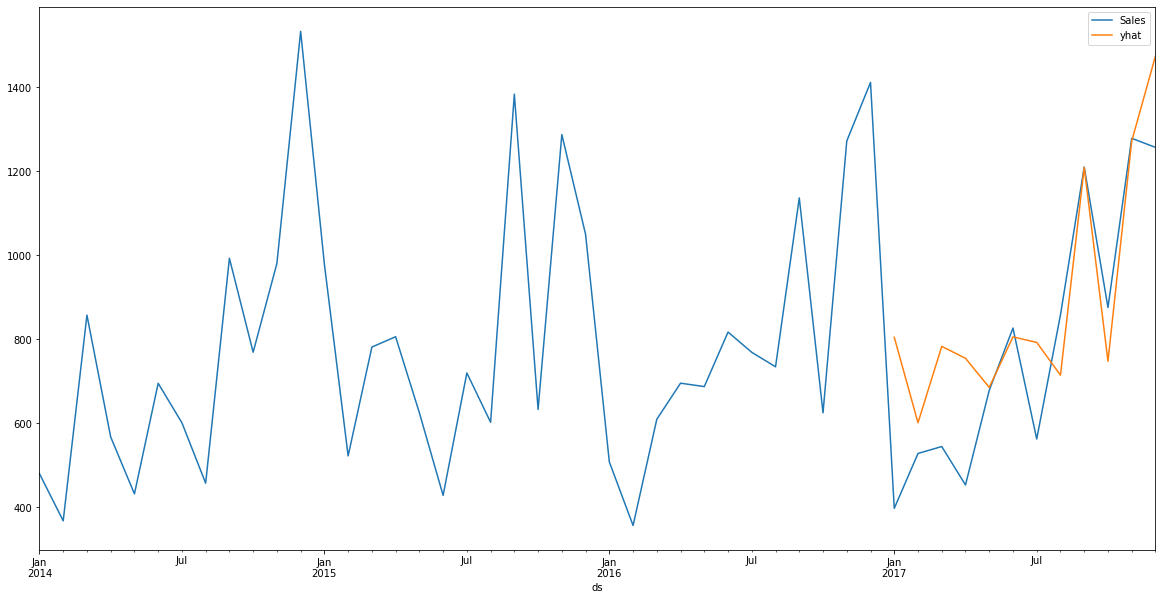

In [46]:
ax = data.plot()
pred.plot(ax = ax, figsize = (20, 10))     # 기존 data와 pred 한꺼번에 그리기

- 파란색: 실제값, 주황색: 예측값

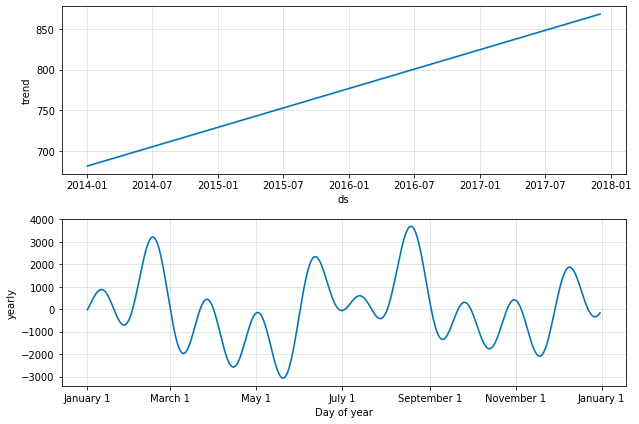

In [47]:
# 예측 모델의 구성요소 plot 확인
## 확인을 위해서는 처음 pred그대로 넣어줘야 하므로(인덱싱하거나 슬라이싱하면 안 됨)
## pred = model.predict(future)다시 실행

pred = model.predict(future)
model.plot_components(pred)
plt.show()